<a href="https://colab.research.google.com/github/shravanbishnoi/Calculus/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tutorial by Shravan~
### LINEAR REGRESSION:- 
LR method is used to estimate the slope and intercept for a straight line.
$$y_{i} = mx_{i} + c + \epsilon_{i}$$

To estimate the value of slope and intercept we will find out value of $m$ and $c$ So that the following error(SE) is minimized.
$$(SE)^2 = \sum_{i=1}^{n} (y_{i}-mx_{i}-c)^2$$

Where ${m}$ is the slope and ${c}$ is the intercept:
$$\frac{\partial SE}{\partial m}=0 \quad and \quad \frac{\partial SE}{\partial c} = 0$$

$$m = \frac {\overline {xy} - \overline {x}.\overline {y}} {\overline {x^2} - \overline {x}^2} \quad and \quad
c = \overline {y} - m\overline {x}$$
Where
$$\overline {x} = {\frac {1}{n} \sum_i^n{x_i}} \quad and \quad
\overline {y} = {\frac {1}{n} \sum_i^n{y_i}}$$

OBSERVATION: As we increase alpha for linear form, to a some extent we get closer to the value of m we had taken initially but after that we begin deviate from the initial value of m. It is good for estimating m but not for estimating value c.

SECTION-1: Following is the Linear Regression for linear equation

In [57]:
# importing required modules for the calculation and plotting purpose
import matplotlib.pyplot as plt
import random
import math
import numpy as np

In [58]:
i = int(input('Enter the initial i:' )) # initial value to start
n = int(input('Enter the final n:' ))   # final value
m = int(input('Enter the random value of m:' )) # m is the slope value
c = int(input('Enter the random value of c:' ))  # intercept value
alpha = int(input("Enter the alpha: "))  # error moderator

Enter the initial i:1
Enter the final n:100
Enter the random value of m:10
Enter the random value of c:6
Enter the alpha: 400


In [59]:
def error(alpha, n):
  """Return: the list of error values.

    Parameter alpha: It is the number to generate error.
    Precondition: It must be a number.

    Parameter n: It is the number of observation.
    Precondition: It must be a number.
    """
  err = []
  for k in range(n):
    error = ((random.random())-0.5)*alpha # generating error using random values
    err.append(error)
  return err

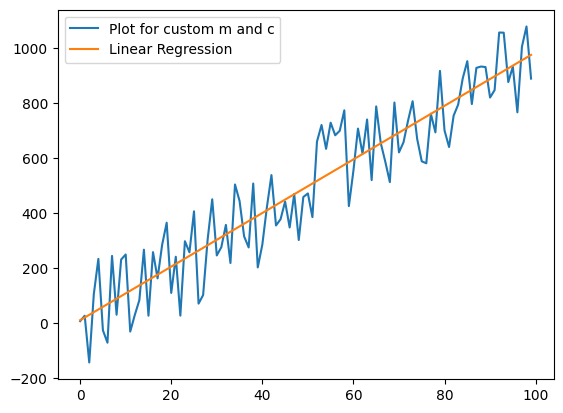

In [61]:
def linearregression(i, n, m, c, alpha):
  """Returns the plotting of linear regression of the linear equaltion"""
  # Calculating for some arbitrary m and c
  x_i = []
  y_i = []
  for k in range(n):
    x_i.append(k)
    err = error(alpha, n)
    y = m*k + c + err[k]
    y_i.append(y)

  # Minimizing SE and finding m and c
  xi_yi_bar = 0
  x_bar = 0
  yi_bar = 0
  xi_sqr_bar = 0
  xi_bar_sqr = 0
  for j in range(n):
    xi_yi_bar += x_i[j]*y_i[j]
    x_bar += x_i[j]
    yi_bar += y_i[j]
    xi_sqr_bar += x_i[j]*x_i[j]
    xi_bar_sqr += x_i[j]
  m_new = (((xi_yi_bar)/n) - ((x_bar/n) * (yi_bar/n)))/((xi_sqr_bar/n) - pow((xi_bar_sqr/n),2))
  c_new = (yi_bar/n) - m_new*(x_bar/n)

  # Calculating for y = mx + c (with new m and c without error)
  xi_new = []
  yi_new = []
  for a in range(n):
    xi_new.append(a)
    y_new = m_new*(x_i[a]) + c_new
    yi_new.append(y_new)
  
  # Plotting both and comparing
  plt.plot(x_i, y_i, label = 'Plot for custom m and c')
  plt.plot(xi_new, yi_new, label = 'Linear Regression')
  plt.legend()
  plt.show()
linearregression(i, n, m, c, alpha) # call to the above

SECTION-2: Following is the Linear Regression for exponential equation:
$$y_i = βe^{γx_i + ϵ_i}$$
To solve this by linear regression first of all convert it into linear equation by taking log on both side:
$$\log y_i= log β+ γx_i+ϵ_i$$
consider: $y_i^{new}=log y_i, \quad c=log β \quad and \quad m=γ$

In [62]:
# Prompting user to enter initial values of gama and beta.
beta = float(input('Enter the random value of beta:' ))
gamma = float(input('Enter the random value of gamma:' ))
alpha = float(input('Enter the random value of alpha(0.5): '))

Enter the random value of beta:20
Enter the random value of gamma:5
Enter the random value of alpha(0.5): 0.5


In [63]:
# using math exponential
x_i = []
y_i = []
z_i = []
for k in range(n):
  x_i.append(k/100)
  err = error(alpha, n)
  y = beta*math.exp(gamma*x_i[k] + err[k])
  y_i.append(y)
for j in range(n):
  zi = math.log(y_i[j])
  z_i.append(zi)

In [64]:
xi_zi_bar = 0
x_bar = 0
zi_bar = 0
xi_sqr_bar = 0
xi_bar_sqr = 0
for j in range(n):
  xi_zi_bar += x_i[j]*z_i[j]
  x_bar += x_i[j]
  zi_bar += z_i[j]
  xi_sqr_bar += x_i[j]*x_i[j]
  xi_bar_sqr += x_i[j]
m_new = (((xi_zi_bar)/n) - ((x_bar/n) * (zi_bar/n)))/((xi_sqr_bar/n) - pow((xi_bar_sqr/n),2))
c_new = (zi_bar/n) - m_new*(x_bar/n)

In [65]:
gamma_new = m_new
beta_new = math.exp(c_new)
yi_new = []
for a in range(n):
  y = beta_new*math.exp(gamma_new*x_i[a])
  yi_new.append(y)

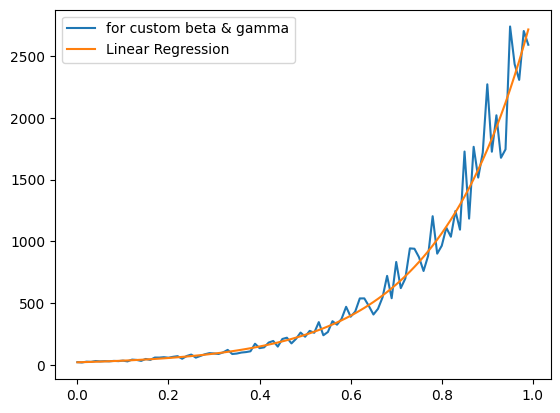

In [66]:
plt.plot(x_i, y_i, label = 'for custom beta & gamma')
plt.plot(x_i, yi_new, label = 'Linear Regression')
plt.legend()
plt.show()
     

SECTION-3: Following is the Linear Regression for POLYNOMIAL EQUATION
$$y_i=m_0+m_1x_i+m_2x_i^2+m_3x_i^3 + m_4x_i^4+...$$
To solve this by Linear regression first of all convert into linear equation of multi variable as follows:
$$y_i=m_0+m_1x_{1i}+ m_2x_{2i}+m_3x_{3i}...$$
where $\quad x_{1i}=x_i, \quad x_{2i}=x_i^2, \quad x_{3i}=x_i^3$ and so on...

In [68]:
n = int(input("Enter the final n: "))
degree = int(input("Enter the degree of the polynomial: ")) # degree of the polynomial
m = [float(input("Enter the values of coefficients: ")) for j in range(degree + 1)] # coefficients degree+1
alpha = float(input('Enter the random value of alpha: ')) # error moderator

Enter the final n: 100
Enter the degree of the polynomial: 7
Enter the values of coefficients: 35
Enter the values of coefficients: 54
Enter the values of coefficients: 23
Enter the values of coefficients: 75
Enter the values of coefficients: 2
Enter the values of coefficients: 57
Enter the values of coefficients: 95
Enter the values of coefficients: 65
Enter the random value of alpha: 0.5


In [69]:
x_i = [k/10 for k in range(n)]
err = error(alpha, n) # calling error function for error list

y_i = []
for j in range(n):
  y = m[0]
  for k in range(degree):
    y += m[k+1]*x_i[j]**(k+1)
  y_i.append(y + err[j])

In [70]:
column = [] # column vector with matrix on left hand side
for j in range(degree*2+1):
  val = 0
  for k in range(n):
    val += x_i[k]**j
  column.append(val)
matrix = [] # matrix 
for j in range(degree + 1):
  matrix.append(column[j:j+degree+1])

In [71]:
cont = [] # column vector on the right side
for j in range(degree + 1):
  val = 0
  for k in range(n):
    val += y_i[k]*x_i[k]**j
  cont.append([val])

In [73]:
# calculating m values
inverse = np.linalg.inv(matrix)        # inverse of matrix
multi = np.dot(inverse, cont)     # list of calculated m

for k in range(degree + 1):
    print(f"Initial Value given explicitly of m{k}: ", m[k])
    print(f"Final Calculated value of m{k}: ", multi[k][0])

Initial Value given explicitly of m0:  35.0
Final Calculated value of m0:  28.3828125
Initial Value given explicitly of m1:  54.0
Final Calculated value of m1:  50.03125
Initial Value given explicitly of m2:  23.0
Final Calculated value of m2:  25.75
Initial Value given explicitly of m3:  75.0
Final Calculated value of m3:  74.4375
Initial Value given explicitly of m4:  2.0
Final Calculated value of m4:  2.0703125
Initial Value given explicitly of m5:  57.0
Final Calculated value of m5:  56.99462890625
Initial Value given explicitly of m6:  95.0
Final Calculated value of m6:  95.00033569335938
Initial Value given explicitly of m7:  65.0
Final Calculated value of m7:  64.99998950958252


OBSERVATION: The above code is for nth degree polynomial.It returns almost exact values which are given initially but above 7 degree polynomial is may return values which differs from the values given initially. Also at alpha=0.5 is provides exact values.